In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Regression
## Dataset

In [3]:
def create_dataset(number_of_samples, degree):
    data = []
    for i in range(0, number_of_samples):
        input_n = random.randint(-5,5)
        v1, v2, v3, v4 = -0.5 * (input_n - 2)**degree, -0.5 * (input_n + 2)**degree, math.sin(((3*math.pi)/2)*input_n), math.cos(math.pi*input_n)
        output_n = math.exp(v1)*v3 - math.exp(v2)*v4
        data.append((input_n, output_n))
    return data

## Linear Regression

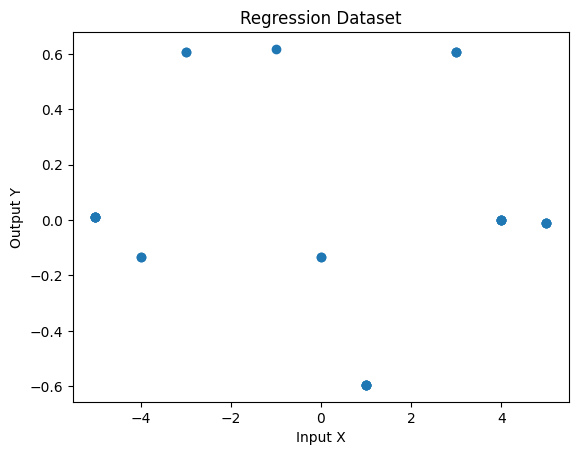


Mean Absolute Error on Test Set: 0.2628

Mean Squared Error on Test Set: 0.1599

Root Mean Squared Error on Test Set: 0.3999


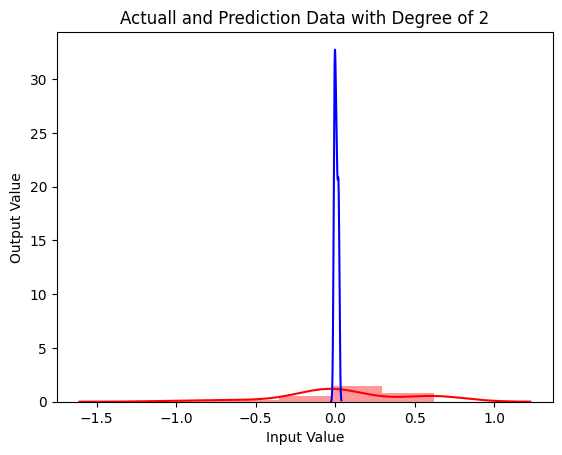

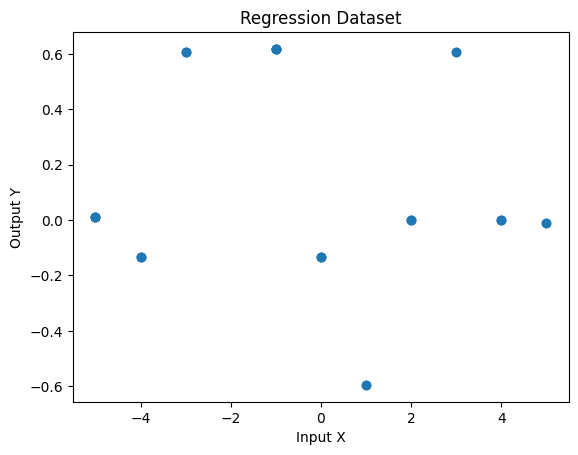


Mean Absolute Error on Test Set: 0.4390

Mean Squared Error on Test Set: 0.3106

Root Mean Squared Error on Test Set: 0.5573


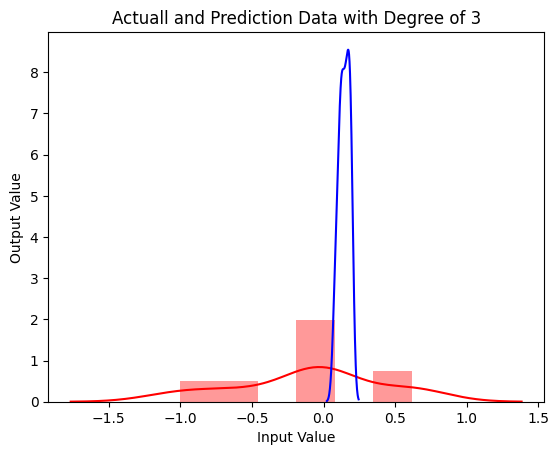

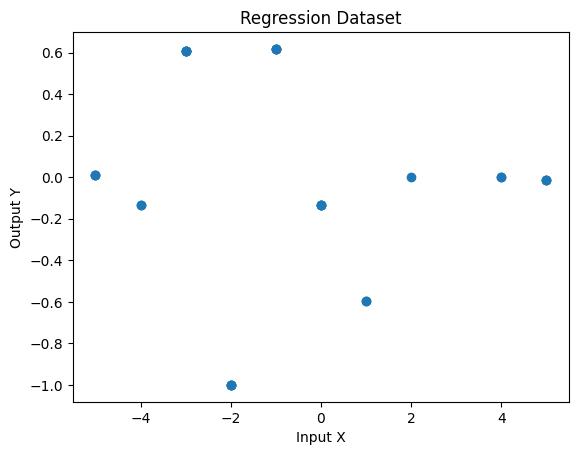


Mean Absolute Error on Test Set: 0.3488

Mean Squared Error on Test Set: 0.2192

Root Mean Squared Error on Test Set: 0.4682


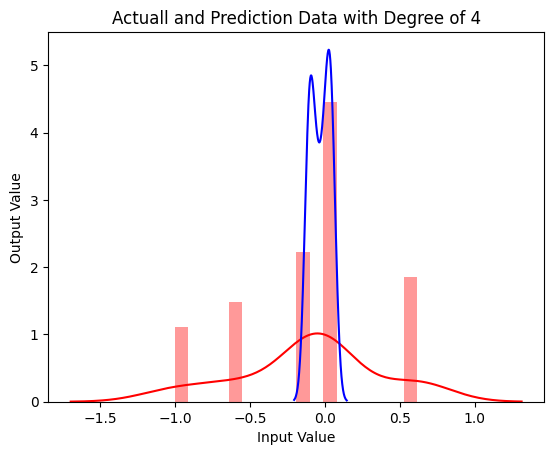

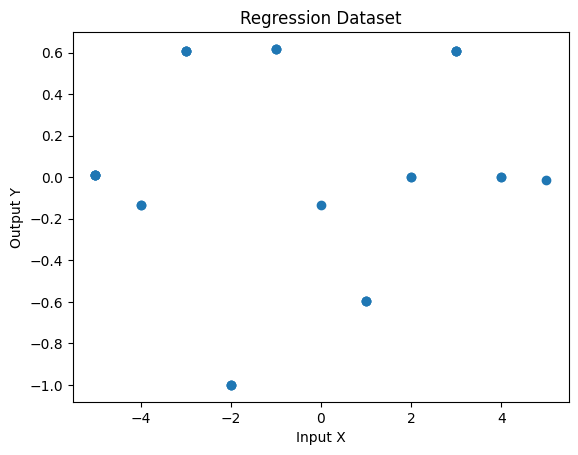


Mean Absolute Error on Test Set: 0.3713

Mean Squared Error on Test Set: 0.2156

Root Mean Squared Error on Test Set: 0.4643


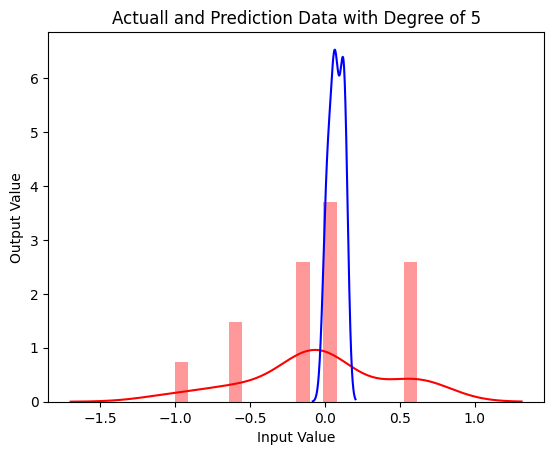

In [13]:
degrees = [2, 3, 4, 5]
colors = ['g', 'b', 'y', 'g']
# dic form store results of all models
collect_results_of_all_model= {
    'Metrics':['MAE','MSE','RMSE']
} 

class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X.dot(self.weights)
    
    def evaluate(self, degree, y_true, y_pred):
        # evaluation measures
        mae = sum(abs(y_true - y_pred)) / len(y_true)
        mse = sum((y_true - y_pred) ** 2) / len(y_true)
        rmse = np.sqrt(mse)

        # Print model evaluation to predicted result    
        print("\nMean Absolute Error on Test Set: {:.4f}".format(mae))    
        print("\nMean Squared Error on Test Set: {:.4f}".format(mse))    
        print("\nRoot Mean Squared Error on Test Set: {:.4f}".format(rmse))

        # plot graph    
        sns.distplot(y_test, hist=True, color="r", label="Actual Value")
        sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" )
        plt.title('Actuall and Prediction Data with Degree of {}'.format(degree))
        plt.xlabel('Input Value')
        plt.ylabel('Output Value')
        plt.show()
    
        # store results of model
        results = [mae, mse, rmse]
        return results
    
for degree, clr in zip(degrees, colors):
    # training data
    train = create_dataset(30, 2)
    train_df = pd.DataFrame(train, columns =['X', 'y'])
    X_train = np.array(train_df[['X']])
    y_train = np.array(train_df['y'])
    
    # plot training data
    plt.scatter(X_train, y_train)
    plt.title('Regression Dataset')
    plt.xlabel('Input X')
    plt.ylabel('Output Y')
    plt.show()

    # testing data
    test = create_dataset(30, 2)
    test_df = pd.DataFrame(test, columns =['X', 'y'])
    X_test = np.array(test_df[['X']])
    y_test = np.array(test_df['y'])
    
    # regression model
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    regression_results = reg.evaluate(degree, y_test, y_pred)
    collect_results_of_all_model["Degre {}".format(degree)] = regression_results

+-----------+-----------+-----------+-----------+-----------+
| Metrics   |   Degre 2 |   Degre 3 |   Degre 4 |   Degre 5 |
|-----------+-----------+-----------+-----------+-----------|
| MAE       |  0.352413 |  0.429138 |  0.389977 |  0.486385 |
| MSE       |  0.225695 |  0.29372  |  0.282977 |  0.358268 |
| RMSE      |  0.475074 |  0.541959 |  0.531956 |  0.598555 |
+-----------+-----------+-----------+-----------+-----------+


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

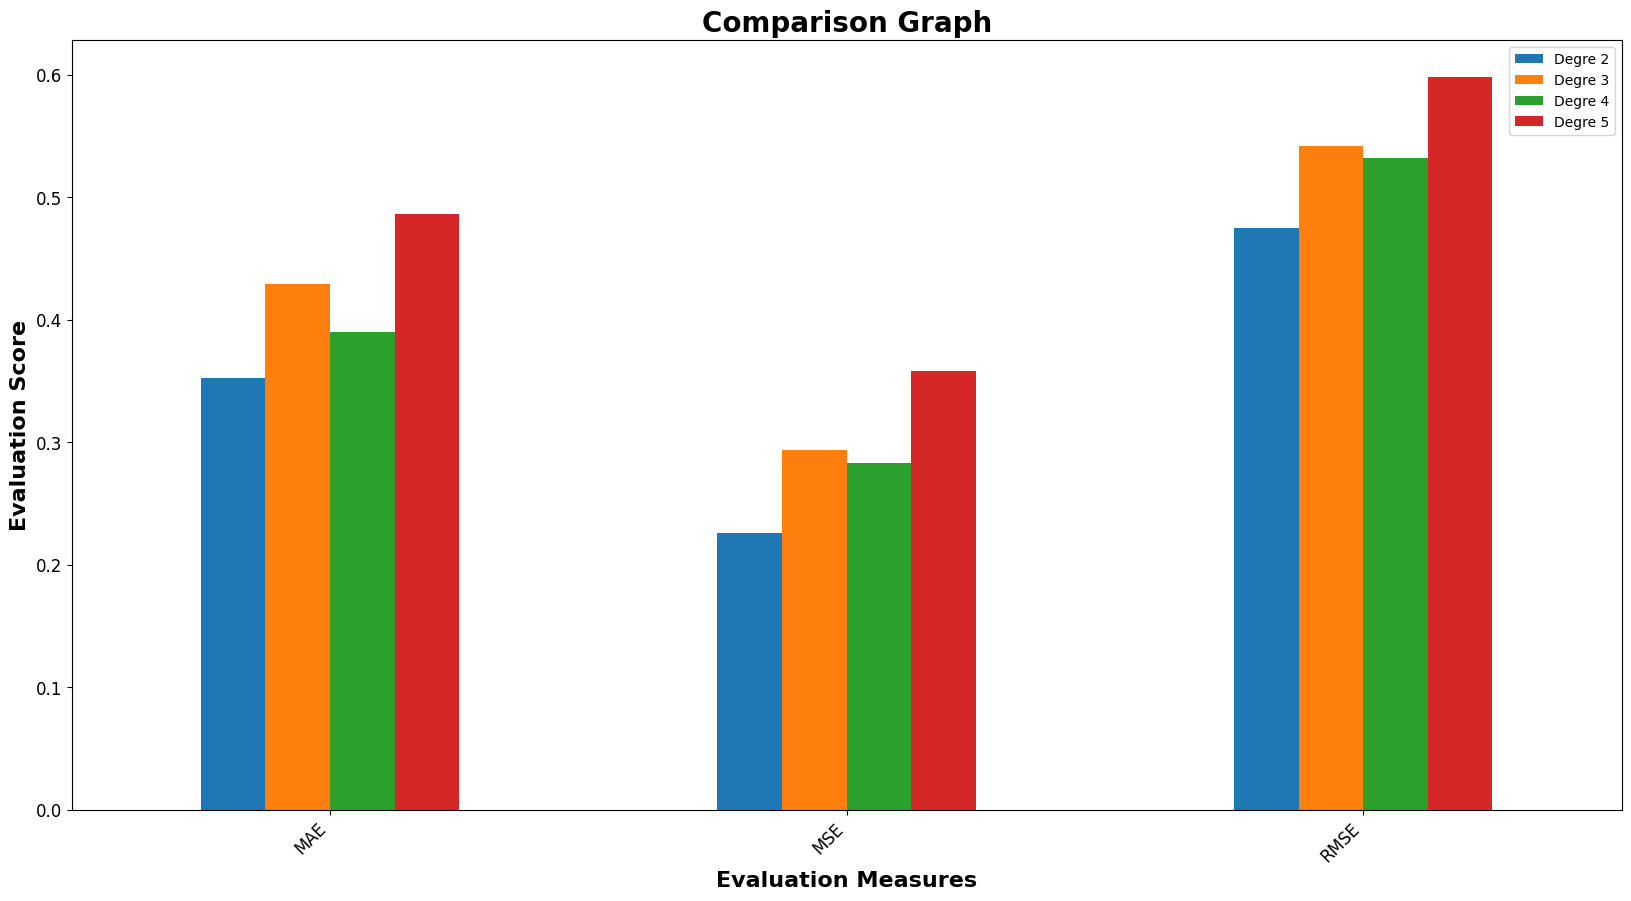

In [5]:
from tabulate import tabulate 
metrics_data_frame = pd.DataFrame(collect_results_of_all_model) # create dataframe
metrics_data_frame = metrics_data_frame.set_index('Metrics') # set index
# displaying the DataFrame
print(tabulate(metrics_data_frame, headers = 'keys', tablefmt = 'psql')) # convert results in to table

metrics_data_frame.plot(kind='bar', figsize=(20,10)) # show comparison base of mertics
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Comparison Graph', fontdict={'size':20, 'weight':'bold'})
plt.ylabel('Evaluation Score', fontdict={'size':16, 'weight':'bold'})
plt.xlabel("Evaluation Measures", fontdict={'size':16, 'weight':'bold'})
# Set the font size of xticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Classification

In [22]:
dataset = load_iris()

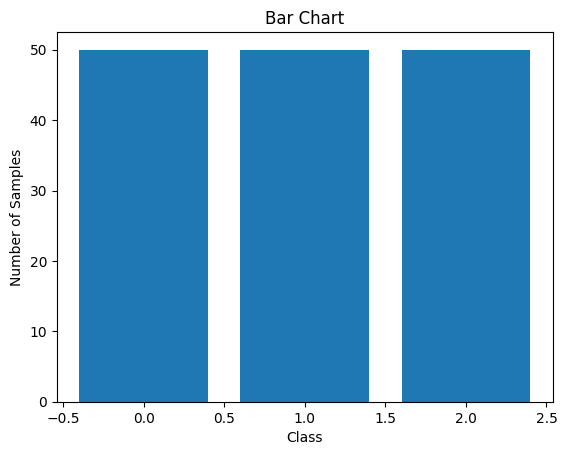

In [36]:
X = dataset.data
y = dataset.target

# create a bar chart
unique, counts = np.unique(y, return_counts=True)
plt.bar(range(3), counts)

# add labels and a title
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Bar Chart')
plt.show()

In [8]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [9]:
class MultiClassClassifier:
    def __init__(self, num_classes, num_features):
        self.num_classes = num_classes
        self.num_features = num_features
        self.weights = np.random.rand(num_classes, num_features)

    def softmax(self, X):
        exps = np.exp(X)
        return exps / np.sum(exps, axis=1, keepdims=True)

    def train(self, X, y, learning_rate=0.0001, num_iterations=200):
        for i in range(num_iterations):
            probs = self.softmax(X.dot(self.weights.T))
            loss = -np.mean(np.log(probs[range(X.shape[0]), y]))
            grad = -(np.eye(self.num_classes)[y] - probs).T.dot(X)
            self.weights -= learning_rate * grad

    def predict(self, X):
        probs = self.softmax(X.dot(self.weights.T))
        return np.argmax(probs, axis=1)
    
    def evaluate(self, y_true, y_pred, lr):

        # calculate precision, recall, f1-score for each class
        classes = set(y_true)
        precision, recall, f1 = {}, {}, {}
        for c in classes:
            tp, fp, fn = 0, 0, 0
            for i in range(len(y_true)):
                if y_true[i] == y_pred[i] == c:
                    tp += 1
                elif y_pred[i] == c and y_true[i] != y_pred[i]:
                    fp += 1
                elif y_true[i] == c and y_true[i] != y_pred[i]:
                    fn += 1
            precision[c] = tp / (tp + fp) if tp + fp != 0 else 0
            recall[c] = tp / (tp + fn) if tp + fn != 0 else 0
            f1[c] = 2 * (precision[c] * recall[c]) / (precision[c] + recall[c]) if precision[c] + recall[c] != 0 else 0
        

        accuracy = sum(y_true == y_pred) / len(y_true)
        precision = sum(precision.values()) / len(precision)
        recall = sum(recall.values()) / len(recall)
        f1 = sum(f1.values()) / len(f1)
        
        print("Accuracy: ", accuracy)
        print("Precision: ", precision)
        print("Recall: ", recall)
        print("F1-score: ", f1)

        # calculate and plot confusion matrix
        conf_matrix = [[0 for _ in range(len(classes))] for _ in range(len(classes))]
        for i in range(len(y_true)):
            conf_matrix[y_true[i]][y_pred[i]] += 1
            
        sns.heatmap(conf_matrix, annot=True, fmt='g',cmap='jet')
        plt.title('Confusion Matrix with LR {}'.format(lr))
        plt.xlabel('predicted Labels')
        plt.ylabel('Actual Labels')
        plt.tight_layout()
        plt.show()

        #store results of model
        results = [accuracy, precision, recall, f1]
        return results

Accuracy:  0.9
Precision:  0.9074074074074074
Recall:  0.9090909090909092
F1-score:  0.9035805626598465


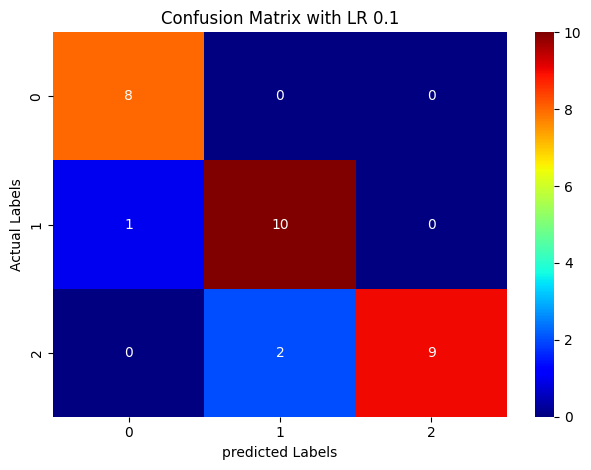

Accuracy:  0.6333333333333333
Precision:  0.45
Recall:  0.6666666666666666
F1-score:  0.5328554360812426


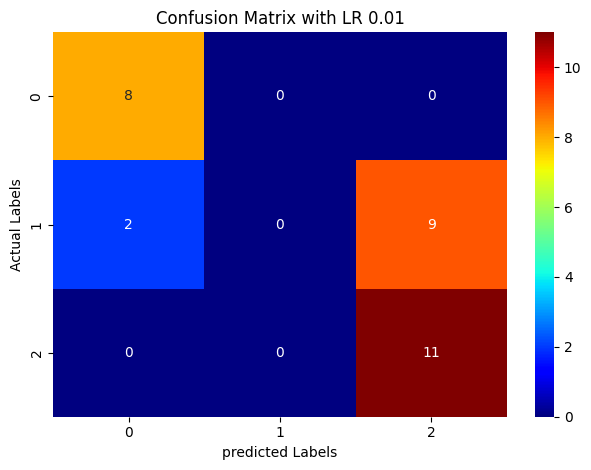

Accuracy:  0.9
Precision:  0.9285714285714285
Recall:  0.9090909090909092
F1-score:  0.9073684210526315


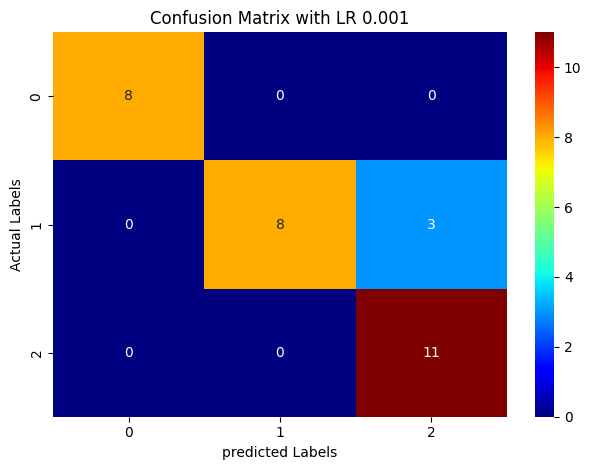

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0


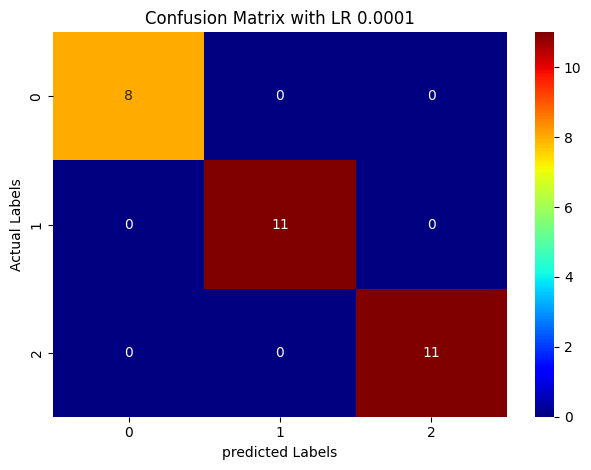

In [10]:
#dic form store results of all models
collect_results_of_all_model= {
    'Metrics':['accuracy','precision','recall','f1-score']
} 


for lr in [0.1, 0.01, 0.001, 0.0001]:
    # create a multi-class classifier with 3 classes and 4 features
    clf = MultiClassClassifier(3, 4)
    clf.train(X_train, y_train, learning_rate=lr)
    y_pred = clf.predict(X_test)
    results = clf.evaluate(y_test, y_pred, lr)
    collect_results_of_all_model[lr] = results

+-----------+----------+----------+----------+----------+
| Metrics   |      0.1 |     0.01 |    0.001 |   0.0001 |
|-----------+----------+----------+----------+----------|
| accuracy  | 0.9      | 0.633333 | 0.9      |        1 |
| precision | 0.907407 | 0.45     | 0.928571 |        1 |
| recall    | 0.909091 | 0.666667 | 0.909091 |        1 |
| f1-score  | 0.903581 | 0.532855 | 0.907368 |        1 |
+-----------+----------+----------+----------+----------+


Text(0.5, 0, 'Evaluation Measure')

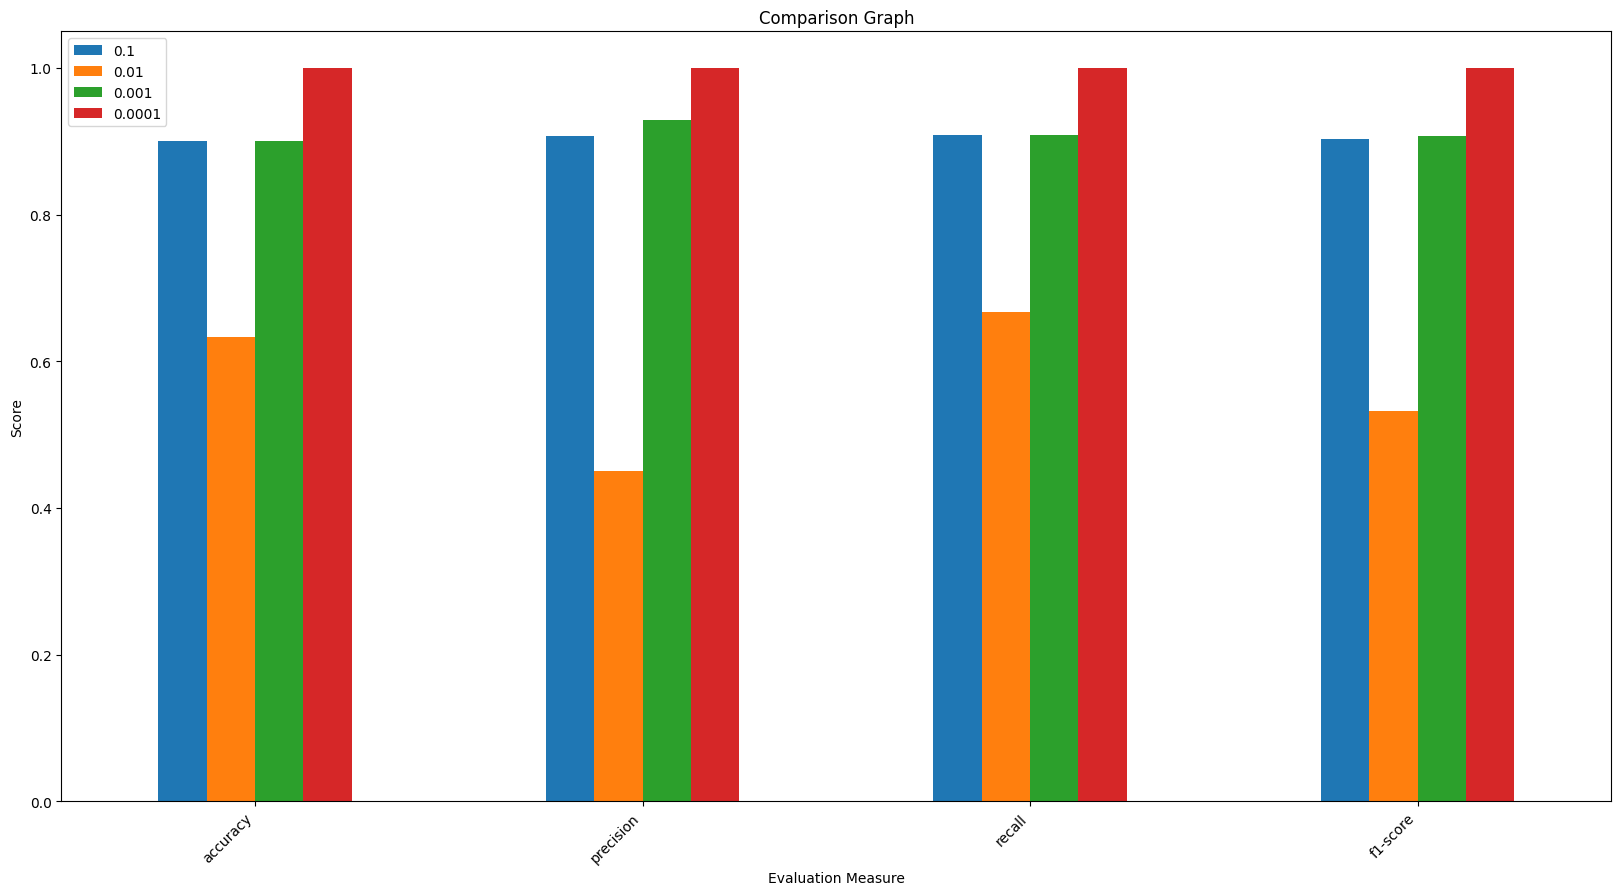

In [11]:
from tabulate import tabulate 
metrics_data_frame = pd.DataFrame(collect_results_of_all_model) # create dataframe
metrics_data_frame = metrics_data_frame.set_index('Metrics') # set index
# displaying the DataFrame
print(tabulate(metrics_data_frame, headers = 'keys', tablefmt = 'psql')) # convert results in to table

metrics_data_frame.plot(kind='bar', figsize=(20,10)) # sho comparison base of mertics
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Comparison Graph')
plt.ylabel('Score')
plt.xlabel("Evaluation Measure")

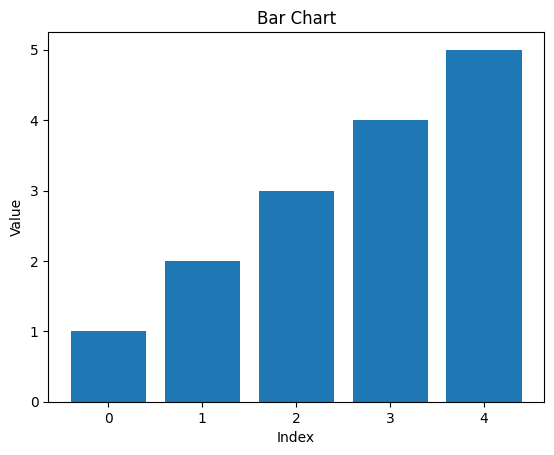

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# data to be plotted as a bar chart
data = np.array([1, 2, 3, 4, 5])

# create a bar chart
plt.bar(range(len(data)), data)

# add labels and a title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Chart')

# show the plot
plt.show()

In [28]:
data

array([1, 2, 3, 4, 5])

In [29]:
unique, counts = np.unique(y, return_counts=True)
counts

array([50, 50, 50], dtype=int64)